In [1]:
from tqdm import tqdm

import numpy as np
import pandas as pd
from itertools import accumulate
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits, load_wine

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/encoded_car_data.csv'
df = pd.read_csv(URL)
df.to_csv("encoded_car_data.csv", index=False)
df.head()

,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,...,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg,price
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,13495.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,16500.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,94.5,2823.0,152.0,2.68,154.0,171.2,65.5,19.0,26.0,16500.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,99.8,2337.0,109.0,3.19,102.0,176.6,66.2,24.0,30.0,13950.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,99.4,2824.0,136.0,3.19,115.0,176.6,66.4,18.0,22.0,17450.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   diesel       205 non-null    float64
 1   gas          205 non-null    float64
 2   std          205 non-null    float64
 3   turbo        205 non-null    float64
 4   convertible  205 non-null    float64
 5   hardtop      205 non-null    float64
 6   hatchback    205 non-null    float64
 7   sedan        205 non-null    float64
 8   wagon        205 non-null    float64
 9   4wd          205 non-null    float64
 10  fwd          205 non-null    float64
 11  rwd          205 non-null    float64
 12  dohc         205 non-null    float64
 13  dohcv        205 non-null    float64
 14  l            205 non-null    float64
 15  ohc          205 non-null    float64
 16  ohcf         205 non-null    float64
 17  ohcv         205 non-null    float64
 18  rotor        205 non-null    float64
 19  eight   

In [4]:
df.isna().sum()

diesel         0
gas            0
std            0
turbo          0
convertible    0
hardtop        0
hatchback      0
sedan          0
wagon          0
4wd            0
fwd            0
rwd            0
dohc           0
dohcv          0
l              0
ohc            0
ohcf           0
ohcv           0
rotor          0
eight          0
five           0
four           0
six            0
three          0
twelve         0
two            0
wheelbase      0
curbweight     0
enginesize     0
boreratio      0
horsepower     0
carlength      0
carwidth       0
citympg        0
highwaympg     0
price          0
dtype: int64

In [5]:
df.shape

(205, 36)

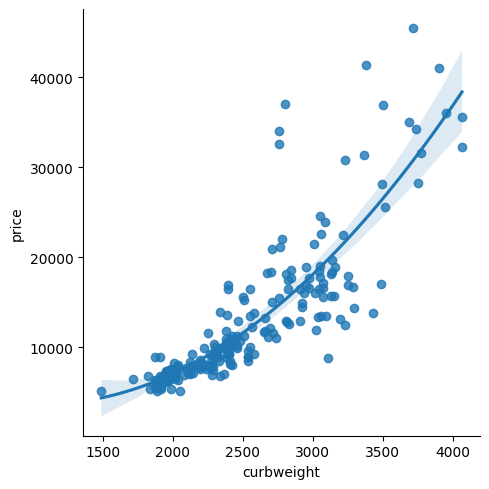

In [7]:
sns.lmplot(x = 'curbweight', y = 'price', data = df, order=2)

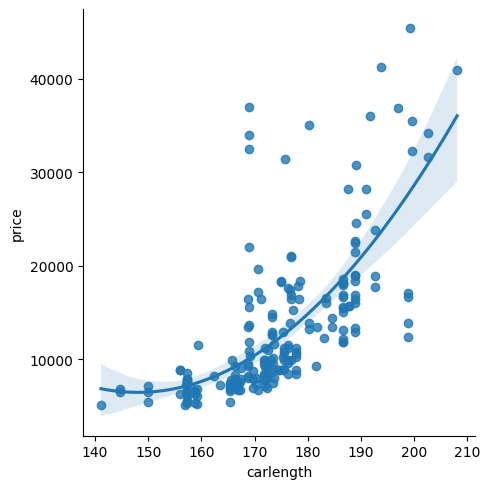

In [9]:
sns.lmplot(x = 'carlength', y = 'price', data = df, order=2)

In [10]:
data = df

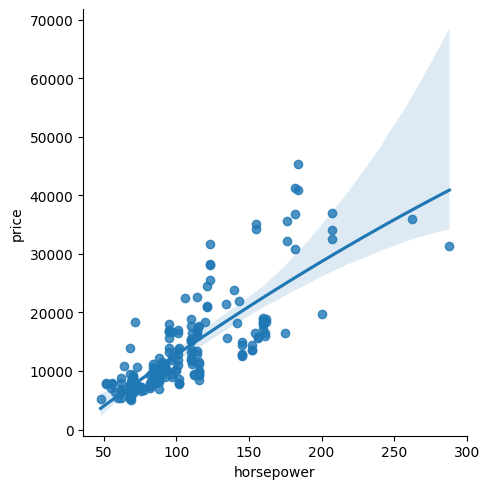

In [11]:
sns.lmplot(x = 'horsepower', y = 'price', data = data, order=2)

In [12]:
X = data.drop('price', axis=1)
y = data.price

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape

((143, 35), (62, 35))

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(x_train, y_train)

LinearRegression()

In [17]:
predicted = lm.predict(x_test)

In [19]:
print("R^2 on training  data ",lm.score(x_train, y_train))
print("R^2 on testing data ",lm.score(x_test,y_test))

R^2 on training  data  0.9262706176757837
R^2 on testing data  0.8469968776972354


In [20]:
def  plot_dis(y,yhat):
    
    plt.figure()
    ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
    sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
    plt.legend()

    plt.title('Actual vs Fitted Values')
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [26]:
def get_R2_features(model,test=True): 
    #X: global  
    features=list(X)
    features.remove("three")
    
    R_2_train=[]
    R_2_test=[]

    for feature in features:
        model.fit(x_train[[feature]],y_train)
        
        R_2_test.append(model.score(x_test[[feature]],y_test))
        R_2_train.append(model.score(x_train[[feature]],y_train))
        
    plt.bar(features,R_2_train,label="Train")
    plt.bar(features,R_2_test,label="Test")
    plt.xticks(rotation=90)
    plt.ylabel("$R^2$")
    plt.legend()
    plt.show()
    print("Training R^2 mean value {} Testing R^2 mean value {} ".format(str(np.mean(R_2_train)),str(np.mean(R_2_test))) )
    print("Training R^2 max value {} Testing R^2 max value {} ".format(str(np.max(R_2_train)),str(np.max(R_2_test))) )

C:\Users\Muhammad Umer Khan\AppData\Local\Temp\ipykernel_11836\4156269868.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
C:\Users\Muhammad Umer Khan\AppData\Local\Temp\ipykernel_11836\4156269868.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637

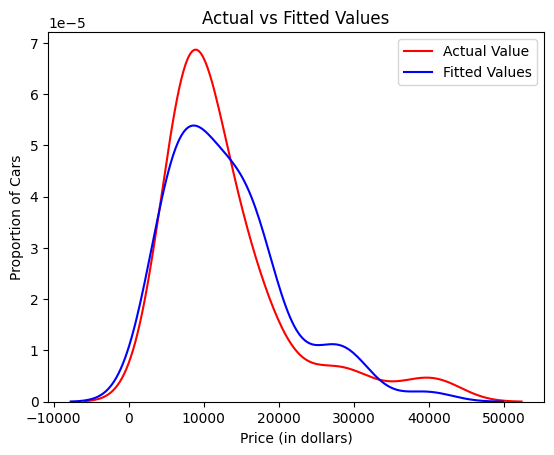

In [22]:
plot_dis(y_test, predicted)

In [23]:
{col:coef for col,coef in zip(X.columns, lm.coef_)}

{'diesel': -132669803630665.25,
 'gas': -132669803632208.89,
 'std': 299.2478942871094,
 'turbo': -300.6369323730469,
 'convertible': 1787.155502319336,
 'hardtop': 3179.4016914367676,
 'hatchback': -1776.6739501953125,
 'sedan': -687.8070983886719,
 'wagon': -2502.145893096924,
 '4wd': -602.3467197418213,
 'fwd': -266.2452812194824,
 'rwd': 868.6755828857422,
 'dohc': 2464.6489067077637,
 'dohcv': -13275.828635692596,
 'l': 2147.9491119384766,
 'ohc': 4643.991107940674,
 'ohcf': 6069.924392700195,
 'ohcv': -2813.777446746826,
 'rotor': 763.0945253372192,
 'eight': 9228.22187423706,
 'five': -2744.541042327881,
 'four': -5333.236814498901,
 'six': -2138.1472358703613,
 'three': -0.0003662109375,
 'twelve': 224.66603231430054,
 'two': 763.0925722122192,
 'wheelbase': 100.58837890625,
 'curbweight': 4.859375,
 'enginesize': 23.36328125,
 'boreratio': -1781.3706436157227,
 'horsepower': 68.48828125,
 'carlength': -64.53515625,
 'carwidth': 579.90576171875,
 'citympg': -162.031005859375,
 

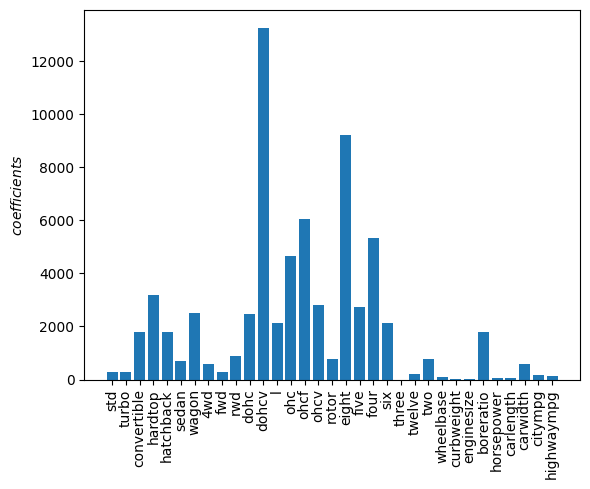

In [24]:
plt.bar(X.columns[2:],abs(lm.coef_[2:]))
plt.xticks(rotation=90)
plt.ylabel("$coefficients$")
plt.show()

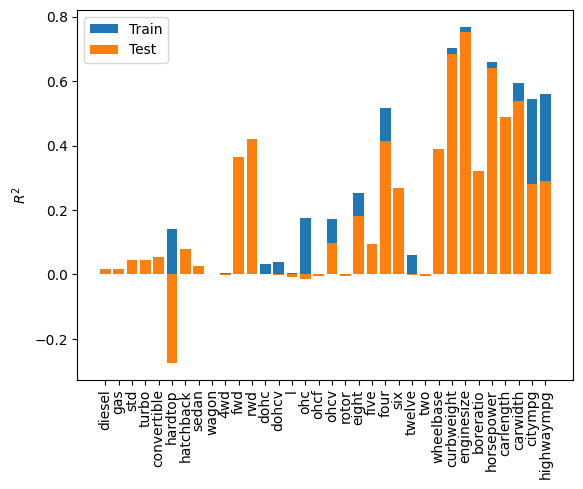

Training R^2 mean value 0.21817773426877918 Testing R^2 mean value 0.18241493035139267 
Training R^2 max value 0.7686929078033782 Testing R^2 max value 0.7534902447506853 


In [27]:
get_R2_features(lm)

In [28]:
from sklearn import pipeline


pipe = Pipeline([('ss', StandardScaler()), ('lr', LinearRegression())])

In [29]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('ss', StandardScaler()), ('lr', LinearRegression())])

In [31]:
print("R^2 on training  data ", pipe.score(x_train, y_train))
print("R^2 on testing data ", pipe.score(x_test,y_test))

R^2 on training  data  0.9258882140110949
R^2 on testing data  -3.2062401134864994e+23


C:\Users\Muhammad Umer Khan\AppData\Local\Temp\ipykernel_11836\4156269868.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
C:\Users\Muhammad Umer Khan\AppData\Local\Temp\ipykernel_11836\4156269868.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637

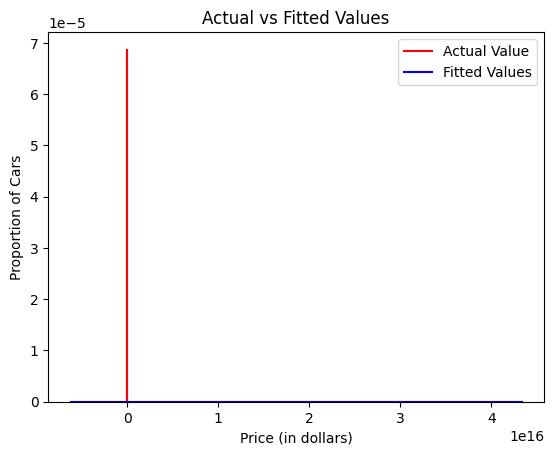

In [33]:
predicted = pipe.predict(x_test)
plot_dis(y_test,predicted)

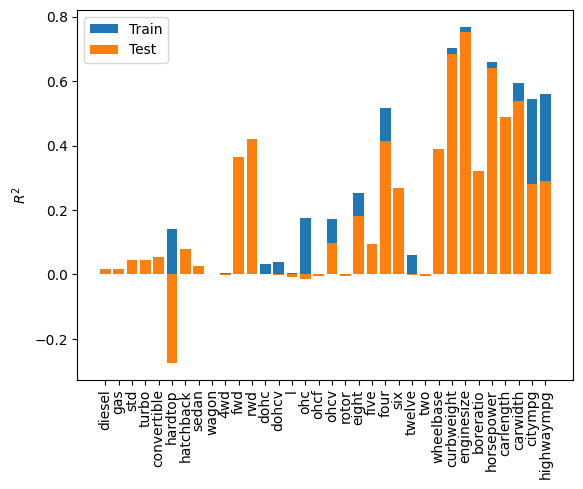

Training R^2 mean value 0.21817773426877918 Testing R^2 mean value 0.18241493035139267 
Training R^2 max value 0.7686929078033781 Testing R^2 max value 0.7534902447506853 


In [34]:
pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())])
get_R2_features(pipe)

In [35]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [36]:
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

In [38]:
print(x_train_poly.shape)


(143, 665)


In [40]:
print(x_test_poly.shape)

(62, 665)


In [42]:
lm = LinearRegression()
lm.fit(x_train_poly, y_train)

LinearRegression()

In [44]:
predicted = lm.predict(x_train_poly)

In [46]:
print("R^2 on training data:", lm.score(x_train_poly, y_train))
print("R^2 on testing data:", lm.score(x_test_poly,y_test))

R^2 on training data: 0.9985318497975856
R^2 on testing data: -36729.95758679984


In [47]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model', LinearRegression())]

In [48]:
pipe = Pipeline(Input)

In [50]:
pipe=Pipeline(Input)
pipe.fit(x_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [52]:
print("R^2 on training  data:", pipe.score(x_train, y_train))
print("R^2 on testing data:", pipe.score(x_test,y_test))

R^2 on training  data: 0.9985318497975856
R^2 on testing data: -36729.95758679984


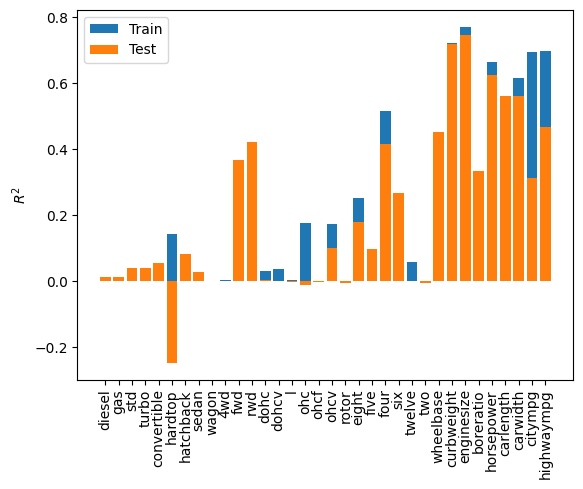

Training R^2 mean value 0.23067272435142522 Testing R^2 mean value 0.19408179624088462 
Training R^2 max value 0.7706959974452947 Testing R^2 max value 0.7463370080614309 


In [53]:
get_R2_features(pipe)

In [54]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('scaler', StandardScaler()),('model',LinearRegression() )]
pipe=Pipeline(Input)

In [55]:
param_grid = {
    "polynomial__degree": [1, 2, 3],
 
    
}

In [56]:
search = GridSearchCV(pipe, param_grid, n_jobs=1)

In [58]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [60]:
search.fit(x_test, y_test)

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('model', LinearRegression())]),
             n_jobs=1, param_grid={'polynomial__degree': [1, 2, 3]})

In [61]:
best=search.best_estimator_
best

Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [62]:
best.score(x_test,y_test)

0.9561454383035948

C:\Users\Muhammad Umer Khan\AppData\Local\Temp\ipykernel_11836\4156269868.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")


C:\Users\Muhammad Umer Khan\AppData\Local\Temp\ipykernel_11836\4156269868.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


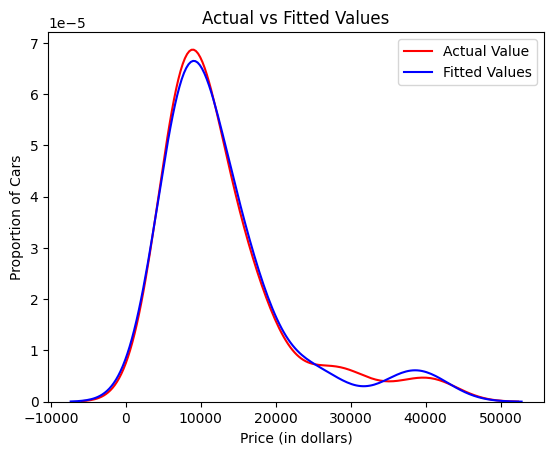

In [64]:
predicted=best.predict(x_test)
plot_dis(y_test,predicted)

In [66]:
features=list(X)


R_2_train=[]
R_2_test=[]

for feature in features:
    param_grid = {
    "polynomial__degree": [ 1, 2,3,4,5],
    "model__positive":[True, False]}
    Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model',LinearRegression())]
    pipe=Pipeline(Input)
    print(feature)
    search = GridSearchCV(pipe, param_grid, n_jobs=2)
    search.fit(x_test[[feature]], y_test)
    best=search.best_estimator_

    R_2_test.append(best.score(x_test[[feature]],y_test))
    R_2_train.append(best.score(x_train[[feature]],y_train))


plt.bar(features,R_2_train,label="Train")
plt.bar(features,R_2_test,label="Test")
plt.xticks(rotation=90)
plt.ylabel("$R^2$")
plt.legend()
plt.show()
print("Training R^2 mean value {} Testing R^2 mean value {} ".format(str(np.mean(R_2_train)),str(np.mean(R_2_test))) )
print("Training R^2 max value {} Testing R^2 max value {} ".format(str(np.max(R_2_train)),str(np.max(R_2_test))) )

diesel


gas
std
turbo


f:\DATA SCIENCE\Python_Files\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
4 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "f:\DATA SCIENCE\Python_Files\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "f:\DATA SCIENCE\Python_Files\.venv\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "f:\DATA SCIENCE\Python_Files\.venv\Lib\site-packages\sklearn\pipeline.py", line 475

convertible


f:\DATA SCIENCE\Python_Files\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
4 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "f:\DATA SCIENCE\Python_Files\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "f:\DATA SCIENCE\Python_Files\.venv\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "f:\DATA SCIENCE\Python_Files\.venv\Lib\site-packages\sklearn\pipeline.py", line 475

hardtop
hatchback
sedan
wagon
4wd
fwd
rwd


f:\DATA SCIENCE\Python_Files\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
4 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "f:\DATA SCIENCE\Python_Files\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "f:\DATA SCIENCE\Python_Files\.venv\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "f:\DATA SCIENCE\Python_Files\.venv\Lib\site-packages\sklearn\pipeline.py", line 475

dohc
dohcv
l
ohc
ohcf
ohcv


f:\DATA SCIENCE\Python_Files\.venv\Lib\site-packages\scipy\optimize\_nnls.py:135: LinAlgWarning: Ill-conditioned matrix (rcond=2.96698e-17): result may not be accurate.
  s[P] = solve(AtA[P_ind[:, None], P_ind[None, :]], Atb[P],
